<a href="https://colab.research.google.com/github/macbhaldar/Data-Science-Python-Handbook/blob/main/Logistic-Regression/Logistic_Regression_RFE_(heart).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#Improving Names
new_columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral',
               'fasting_blood_sugar', 'resting_electrocardiographic_results', 
               'maximum_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 
               'ca','thal','target']

In [5]:
#Replacing Columns Names
for i in range(0, len(df.columns)):
    df.columns.values[i] = new_columns[i]

In [6]:
df_user = pd.DataFrame(np.arange(0, len(df)),columns = ['patient'])
df = pd.concat([df_user,df], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient                               1025 non-null   int64  
 1   age                                   1025 non-null   int64  
 2   sex                                   1025 non-null   int64  
 3   chest_pain_type                       1025 non-null   int64  
 4   resting_blood_pressure                1025 non-null   int64  
 5   cholestoral                           1025 non-null   int64  
 6   fasting_blood_sugar                   1025 non-null   int64  
 7   resting_electrocardiographic_results  1025 non-null   int64  
 8   maximum_heart_rate                    1025 non-null   int64  
 9   exercise_induced_angina               1025 non-null   int64  
 10  oldpeak                               1025 non-null   float64
 11  slope            

In [9]:
df.describe()

,patient,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,512.000000,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,296.036315,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,256.000000,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,512.000000,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,768.000000,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,1024.000000,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


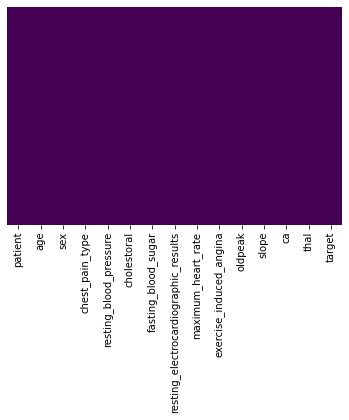

In [10]:
#Verifying Null Values
sns.heatmap(data=df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
df.isna().sum()

patient                                 0
age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
cholestoral                             0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate                      0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
ca                                      0
thal                                    0
target                                  0
dtype: int64

In [12]:
df.isna().any()

patient                                 False
age                                     False
sex                                     False
chest_pain_type                         False
resting_blood_pressure                  False
cholestoral                             False
fasting_blood_sugar                     False
resting_electrocardiographic_results    False
maximum_heart_rate                      False
exercise_induced_angina                 False
oldpeak                                 False
slope                                   False
ca                                      False
thal                                    False
target                                  False
dtype: bool

In [13]:
#Defyning X and y
X = df.drop(['patient','target'], axis=1)
y = df['target']

### Visualizing Data

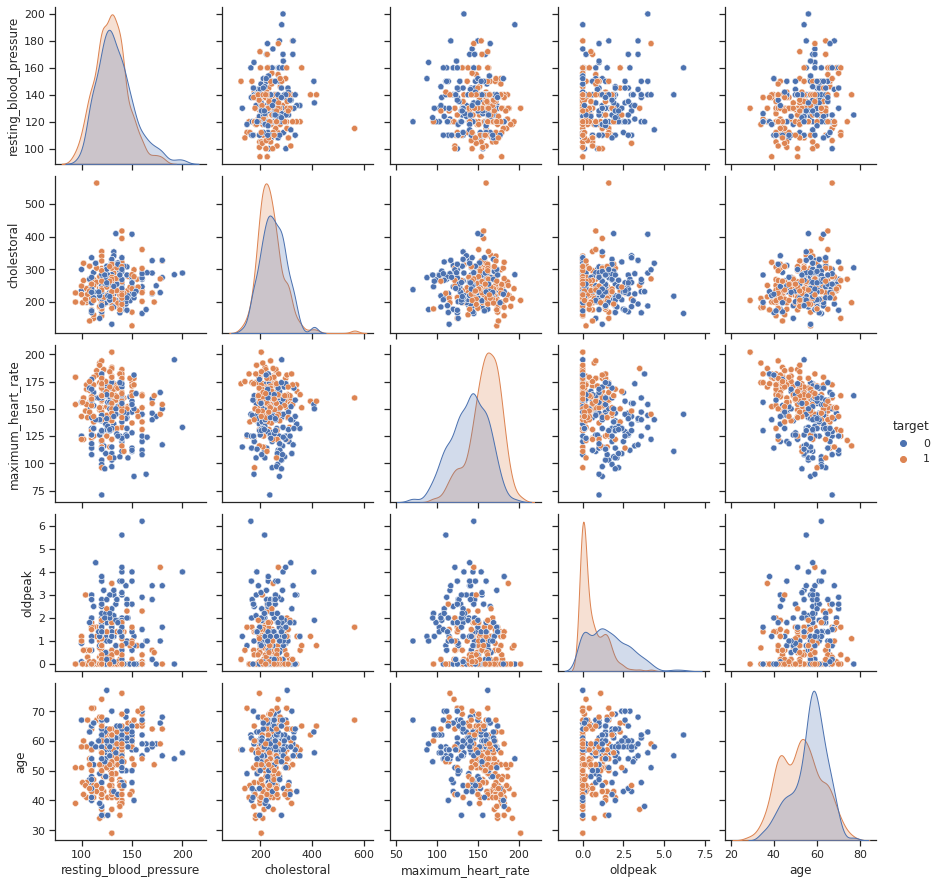

In [14]:
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=df, hue='target',  
             vars=['resting_blood_pressure',
                    'cholestoral',
                    'maximum_heart_rate',
                    'oldpeak', 'age'])

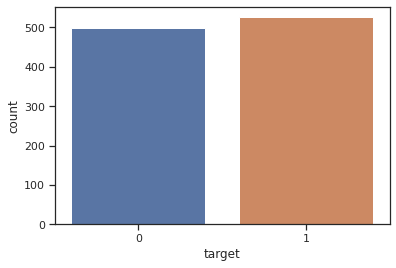

In [15]:
sns.countplot(data=df, x='target')

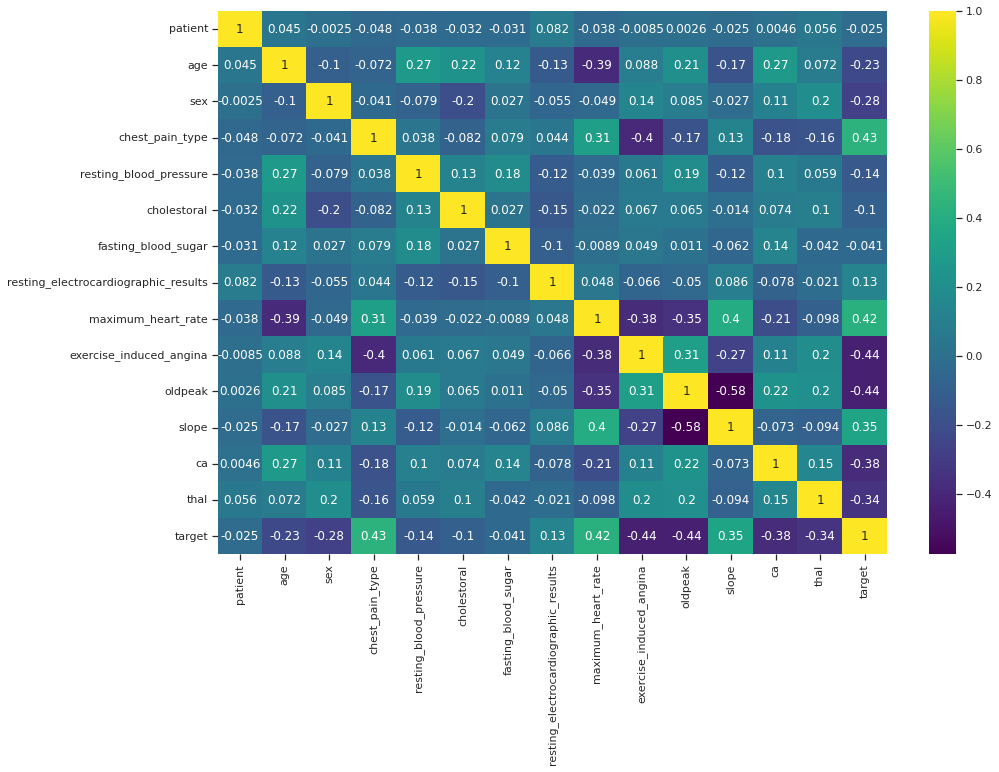

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), annot=True, cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

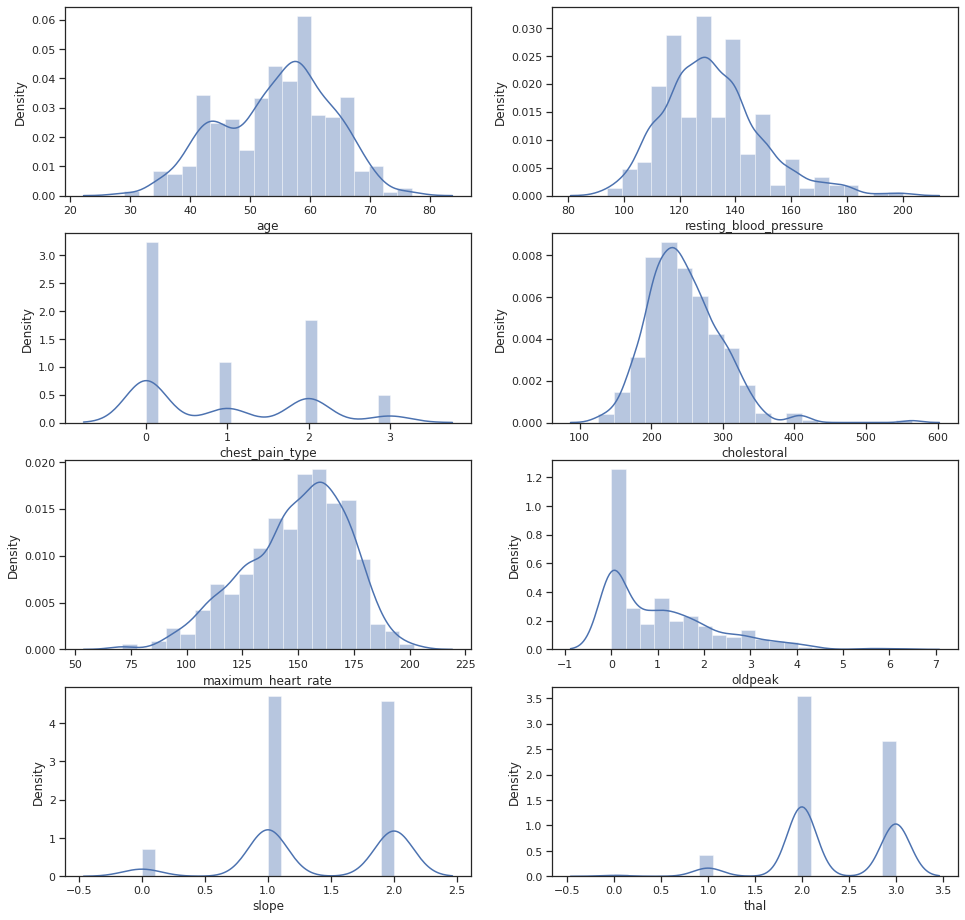

In [17]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.resting_blood_pressure, bins = 20, ax=ax[0,1]) 
sns.distplot(df.chest_pain_type, bins = 20, ax=ax[1,0]) 
sns.distplot(df.cholestoral, bins = 20, ax=ax[1,1]) 
sns.distplot(df.maximum_heart_rate, bins = 20, ax=ax[2,0])
sns.distplot(df.oldpeak, bins = 20, ax=ax[2,1])
sns.distplot(df.slope, bins = 20, ax=ax[3,0]) 
sns.distplot(df.thal, bins = 20, ax=ax[3,1])

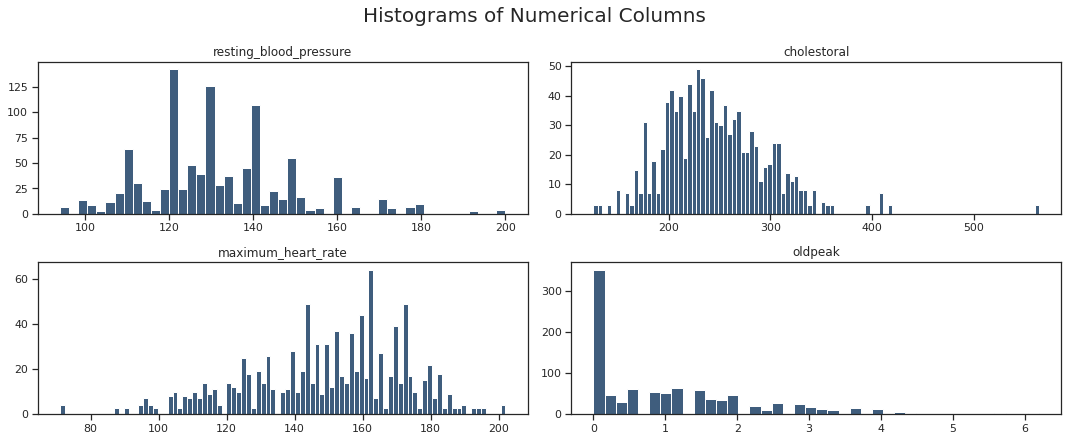

In [18]:
df2 = df[['resting_blood_pressure','cholestoral','maximum_heart_rate','oldpeak']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(4, 2, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

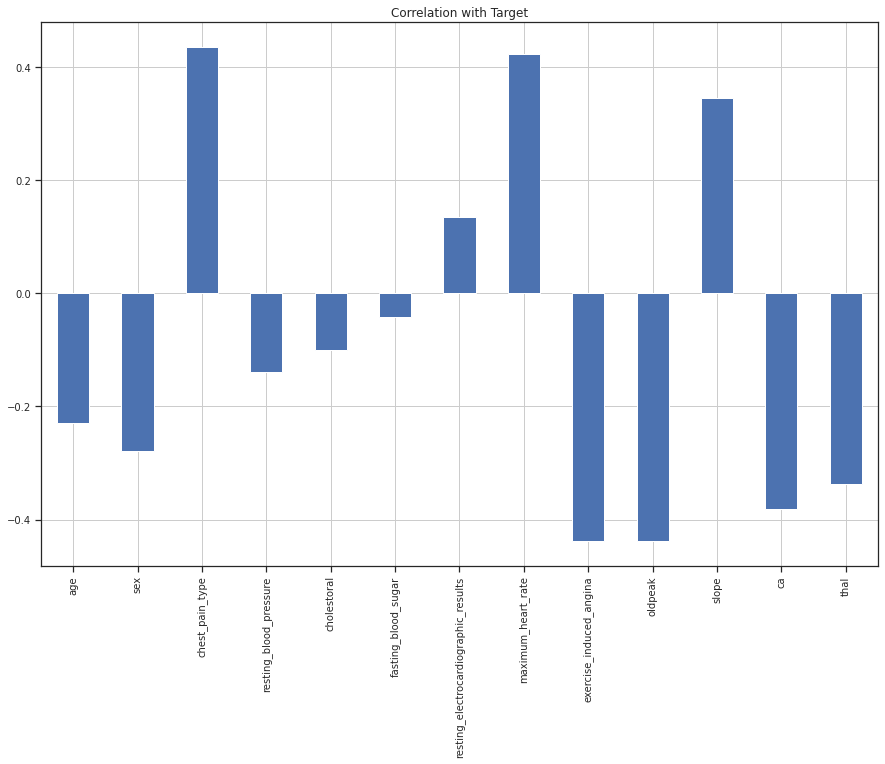

In [19]:
# Correlation with independent variable
X.corrwith(df.target).plot.bar(figsize = (15, 10), title = "Correlation with Target", fontsize = 10,grid = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


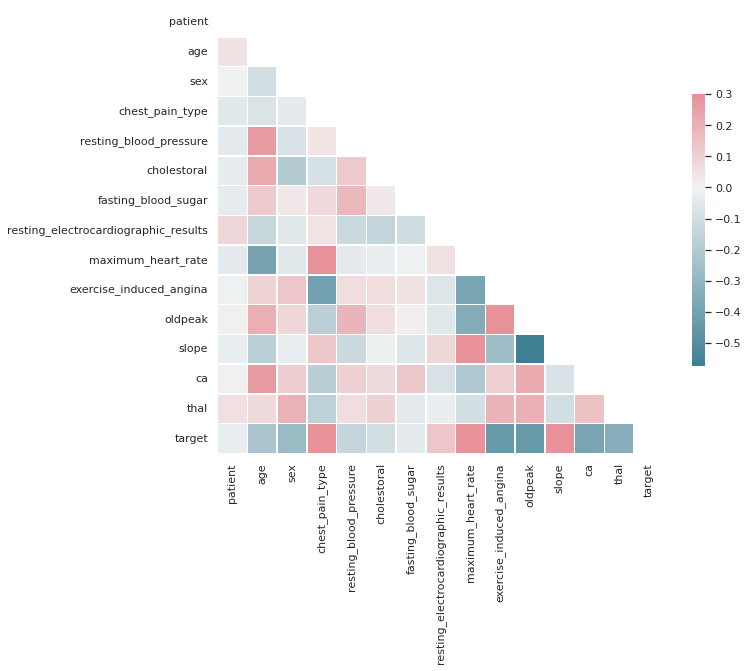

In [20]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

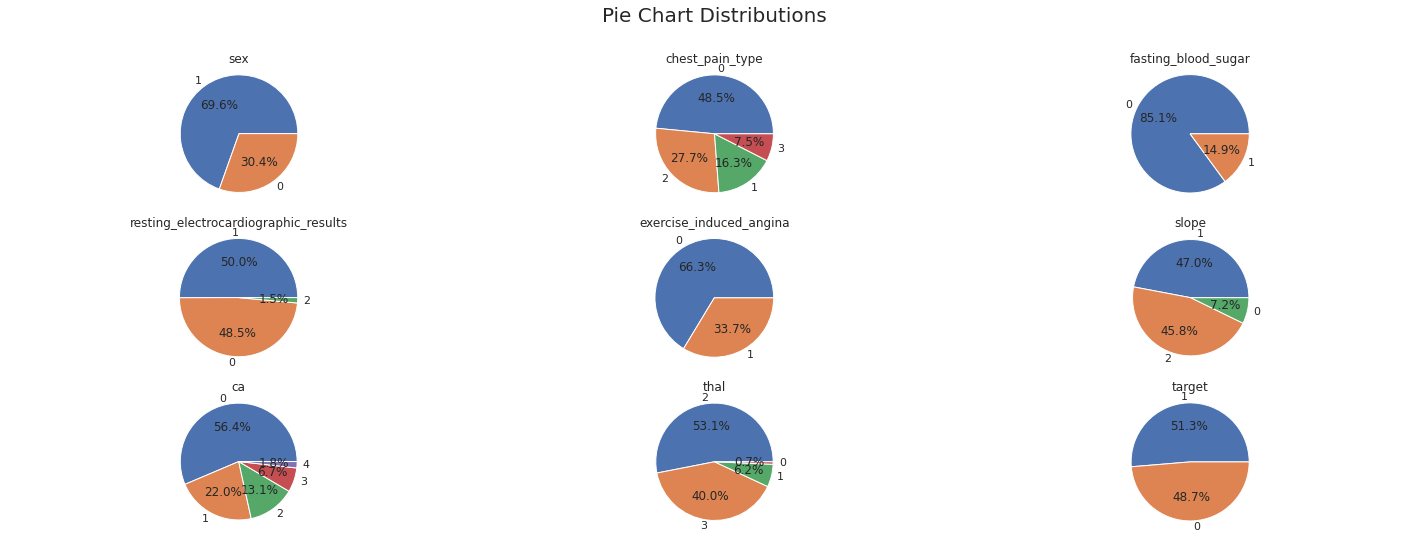

In [21]:
# Pie Plots 
df2 = df[['sex', 'chest_pain_type', 'fasting_blood_sugar',
                    'resting_electrocardiographic_results', 'exercise_induced_angina', 'slope',
                    'ca', 'thal', 'target',
                                        ]]
fig = plt.figure(figsize=(20, 15))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
   
    values = df2.iloc[:, i - 1].value_counts(normalize = True).values
    index = df2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [22]:
# Splitting the dataset into the traing set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

In [23]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [24]:
X_train.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal
397,-1.601551,0.669898,-0.925731,-1.221276,-1.540173,-0.418073,-1.025784,-1.588940,1.435166,0.813914,-0.657506,-0.735969,1.071858
687,0.408388,0.669898,-0.925731,-0.373933,1.043801,-0.418073,-1.025784,0.932348,-0.696784,-0.889530,0.976297,1.161813,1.071858
909,-0.484918,0.669898,-0.925731,0.699368,-0.899036,-0.418073,-1.025784,-1.058143,1.435166,-0.122980,-0.657506,-0.735969,1.071858
153,-0.038265,0.669898,1.038304,-0.656381,0.227810,-0.418073,-1.025784,-0.129247,-0.696784,-0.548841,-0.657506,-0.735969,1.071858
373,0.408388,0.669898,0.056286,-0.656381,0.732947,-0.418073,-1.025784,0.445784,-0.696784,0.643569,-0.657506,-0.735969,-0.537892


In [25]:
X_test.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal
318,0.520051,0.669898,-0.925731,0.473410,-1.345889,-0.418073,0.864425,0.534250,1.435166,-0.889530,0.976297,0.212922,1.071858
394,0.966705,0.669898,-0.925731,-0.091485,1.626653,2.391926,-1.025784,-0.792744,1.435166,0.643569,0.976297,2.110704,1.071858
516,0.631715,0.669898,-0.925731,-0.091485,-0.782466,-0.418073,-1.025784,-0.792744,1.435166,1.154602,-0.657506,1.161813,1.071858
129,0.296725,0.669898,-0.925731,0.473410,-1.054463,-0.418073,0.864425,-0.085014,-0.696784,-0.548841,-0.657506,-0.735969,-2.147643
750,0.073398,0.669898,0.056286,-0.091485,0.305523,-0.418073,0.864425,0.224618,-0.696784,-0.889530,0.976297,-0.735969,-0.537892


### Model Building

In [26]:
# Model Building (Logistic Regression)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [27]:
# Predicting Test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.819512,0.820755,0.828571,0.824645


Test Data Accuracy: 0.8195


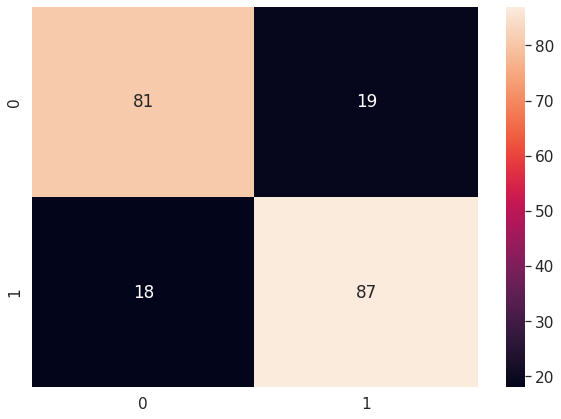

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

### Accuracy Paradox
Accuracy is not the best way to measure a perfomance of model. It´s because Accuracy Paradox. More about Accuracy Paradox here.

### Cumulative Accuracy Profile (CAP)
For figure out Accuracy Paradox, we will use the Cumulative Accuracy Profile (CAP).

In [29]:
#Plotting Cumulative Accuracy Profile (CAP)
y_pred_prob = classifier.predict_proba(X_test)
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
        
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

      0         1
0   1.0  0.995928
1   1.0  0.991844
2   1.0  0.989106
3   1.0  0.989106
4   1.0  0.988132
5   1.0  0.987948
6   1.0  0.987948
7   1.0  0.987272
8   1.0  0.983794
9   1.0  0.982713
10  1.0  0.981969
11  1.0  0.981264
12  1.0  0.979831
13  1.0  0.979831
14  1.0  0.978325
15  1.0  0.974895
16  1.0  0.970325
17  1.0  0.969878
18  1.0  0.969878
19  1.0  0.968907


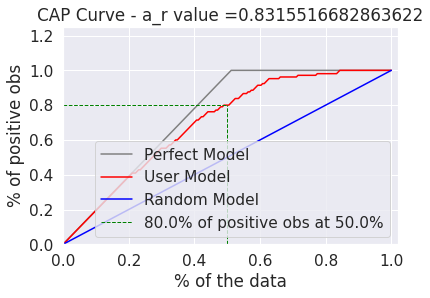

In [30]:
capcurve(y_test,y_pred_prob[:,1])

In [31]:
# Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Logistic Regression (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression (Lasso) Accuracy: 0.848 (+/- 0.061)


In [32]:
# Analyzing the coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.092150
1,sex,-0.915375
2,chest_pain_type,0.894698
3,resting_blood_pressure,-0.312150
4,cholestoral,-0.392934
5,fasting_blood_sugar,0.011709
6,resting_electrocardiographic_results,0.197515
7,maximum_heart_rate,0.444584
8,exercise_induced_angina,-0.404989
9,oldpeak,-0.599038


#### Feature Selection
For feature selection, we wil use the Recursive Feature Elimination (RFE).

In [33]:
# Recursive feature elimination
from sklearn.feature_selection import RFE

# Select best feature 
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

# Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False  True  True False False False False False False  True  True  True
  True]
[7 1 1 5 3 8 6 2 4 1 1 1 1]


Index(['sex', 'chest_pain_type', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


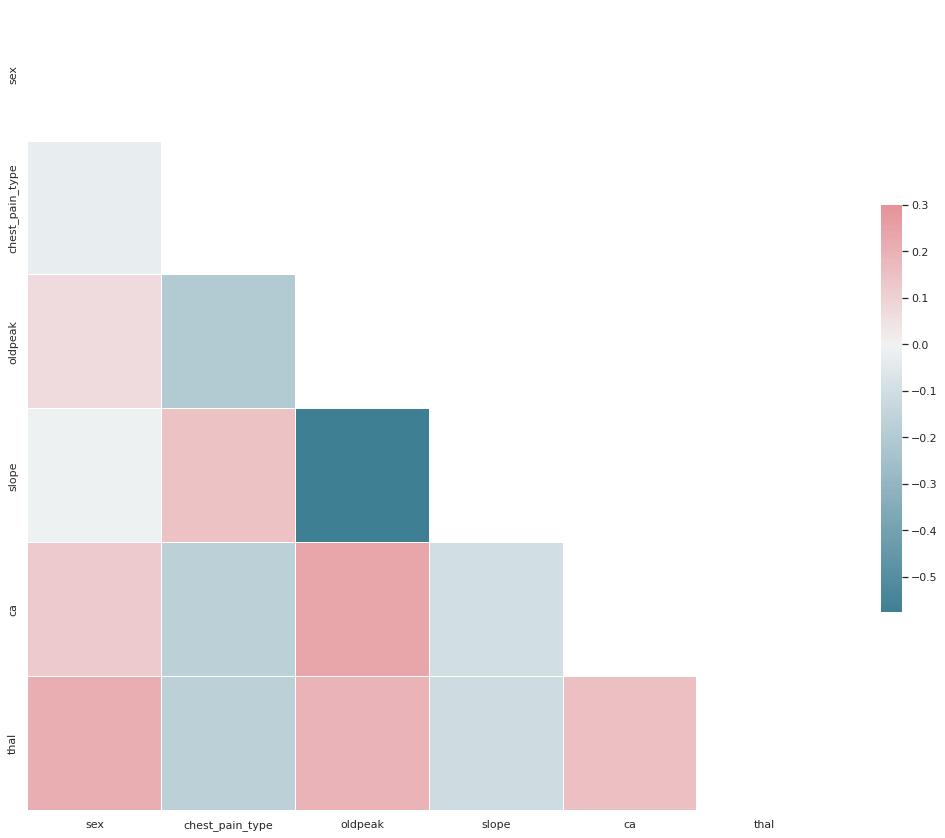

In [34]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty= 'l1', solver='liblinear')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.819512,0.820755,0.828571,0.824645
1,Logistic Regression RFE (Lasso),0.814634,0.825243,0.809524,0.817308
2,Logistic Regression RFE (Lasso),0.814634,0.825243,0.809524,0.817308


      0         1
0   1.0  0.988999
1   1.0  0.985064
2   1.0  0.985064
3   1.0  0.985064
4   1.0  0.982909
5   1.0  0.977643
6   1.0  0.975733
7   0.0  0.975733
8   1.0  0.974445
9   1.0  0.970975
10  1.0  0.970975
11  1.0  0.970368
12  1.0  0.970368
13  1.0  0.970368
14  1.0  0.970368
15  1.0  0.970368
16  1.0  0.961087
17  1.0  0.959294
18  1.0  0.953595
19  1.0  0.953595


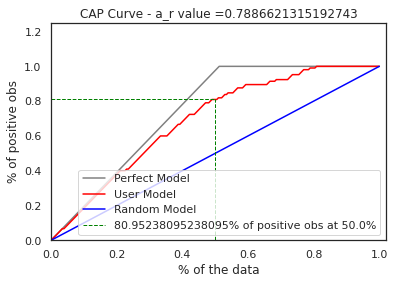

In [36]:
y_pred_prob = classifier.predict_proba(X_test[X_train.columns[rfe.support_]])
capcurve(y_test,y_pred_prob[:,1])